In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.impute import KNNImputer, SimpleImputer
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df =pd.read_csv('diabetes_dataset.csv')

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

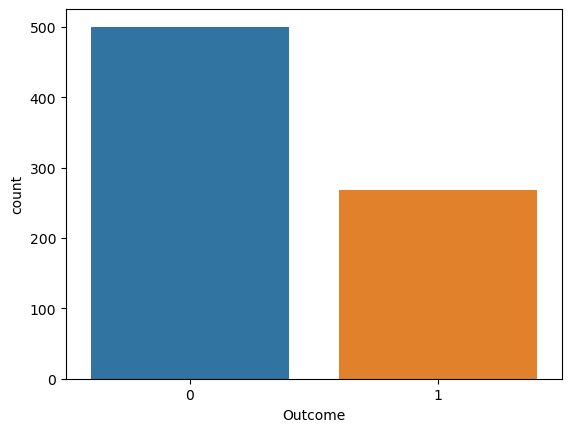

In [5]:
sns.countplot(data=df,x='Outcome')

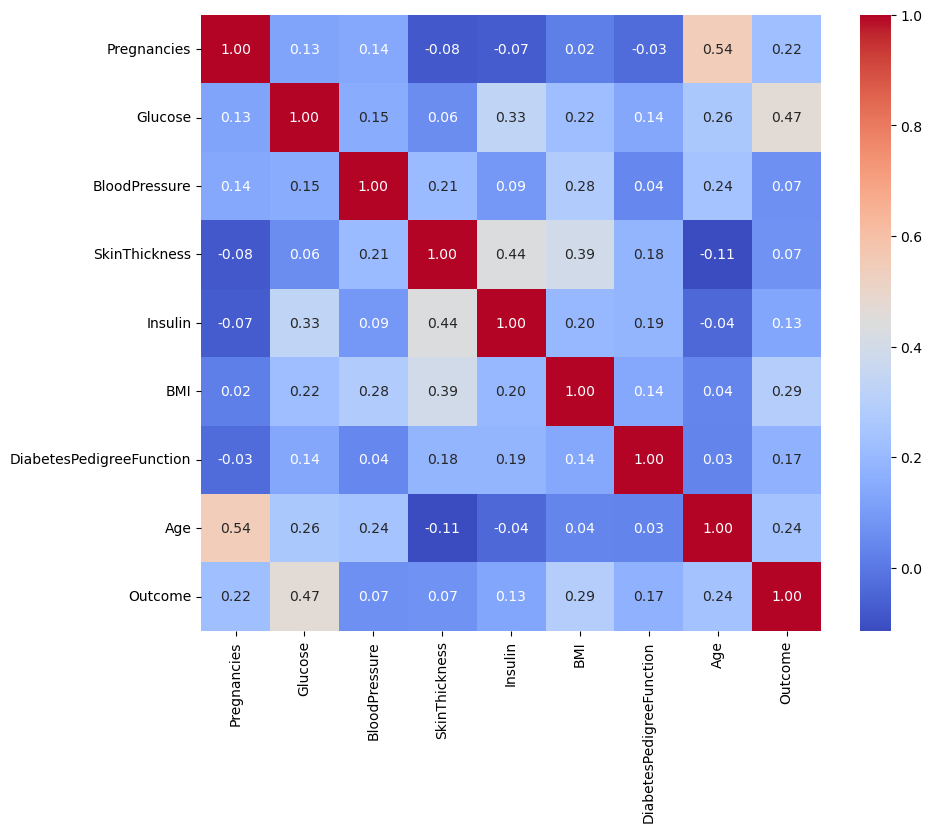

In [6]:
corr_met=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_met,annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

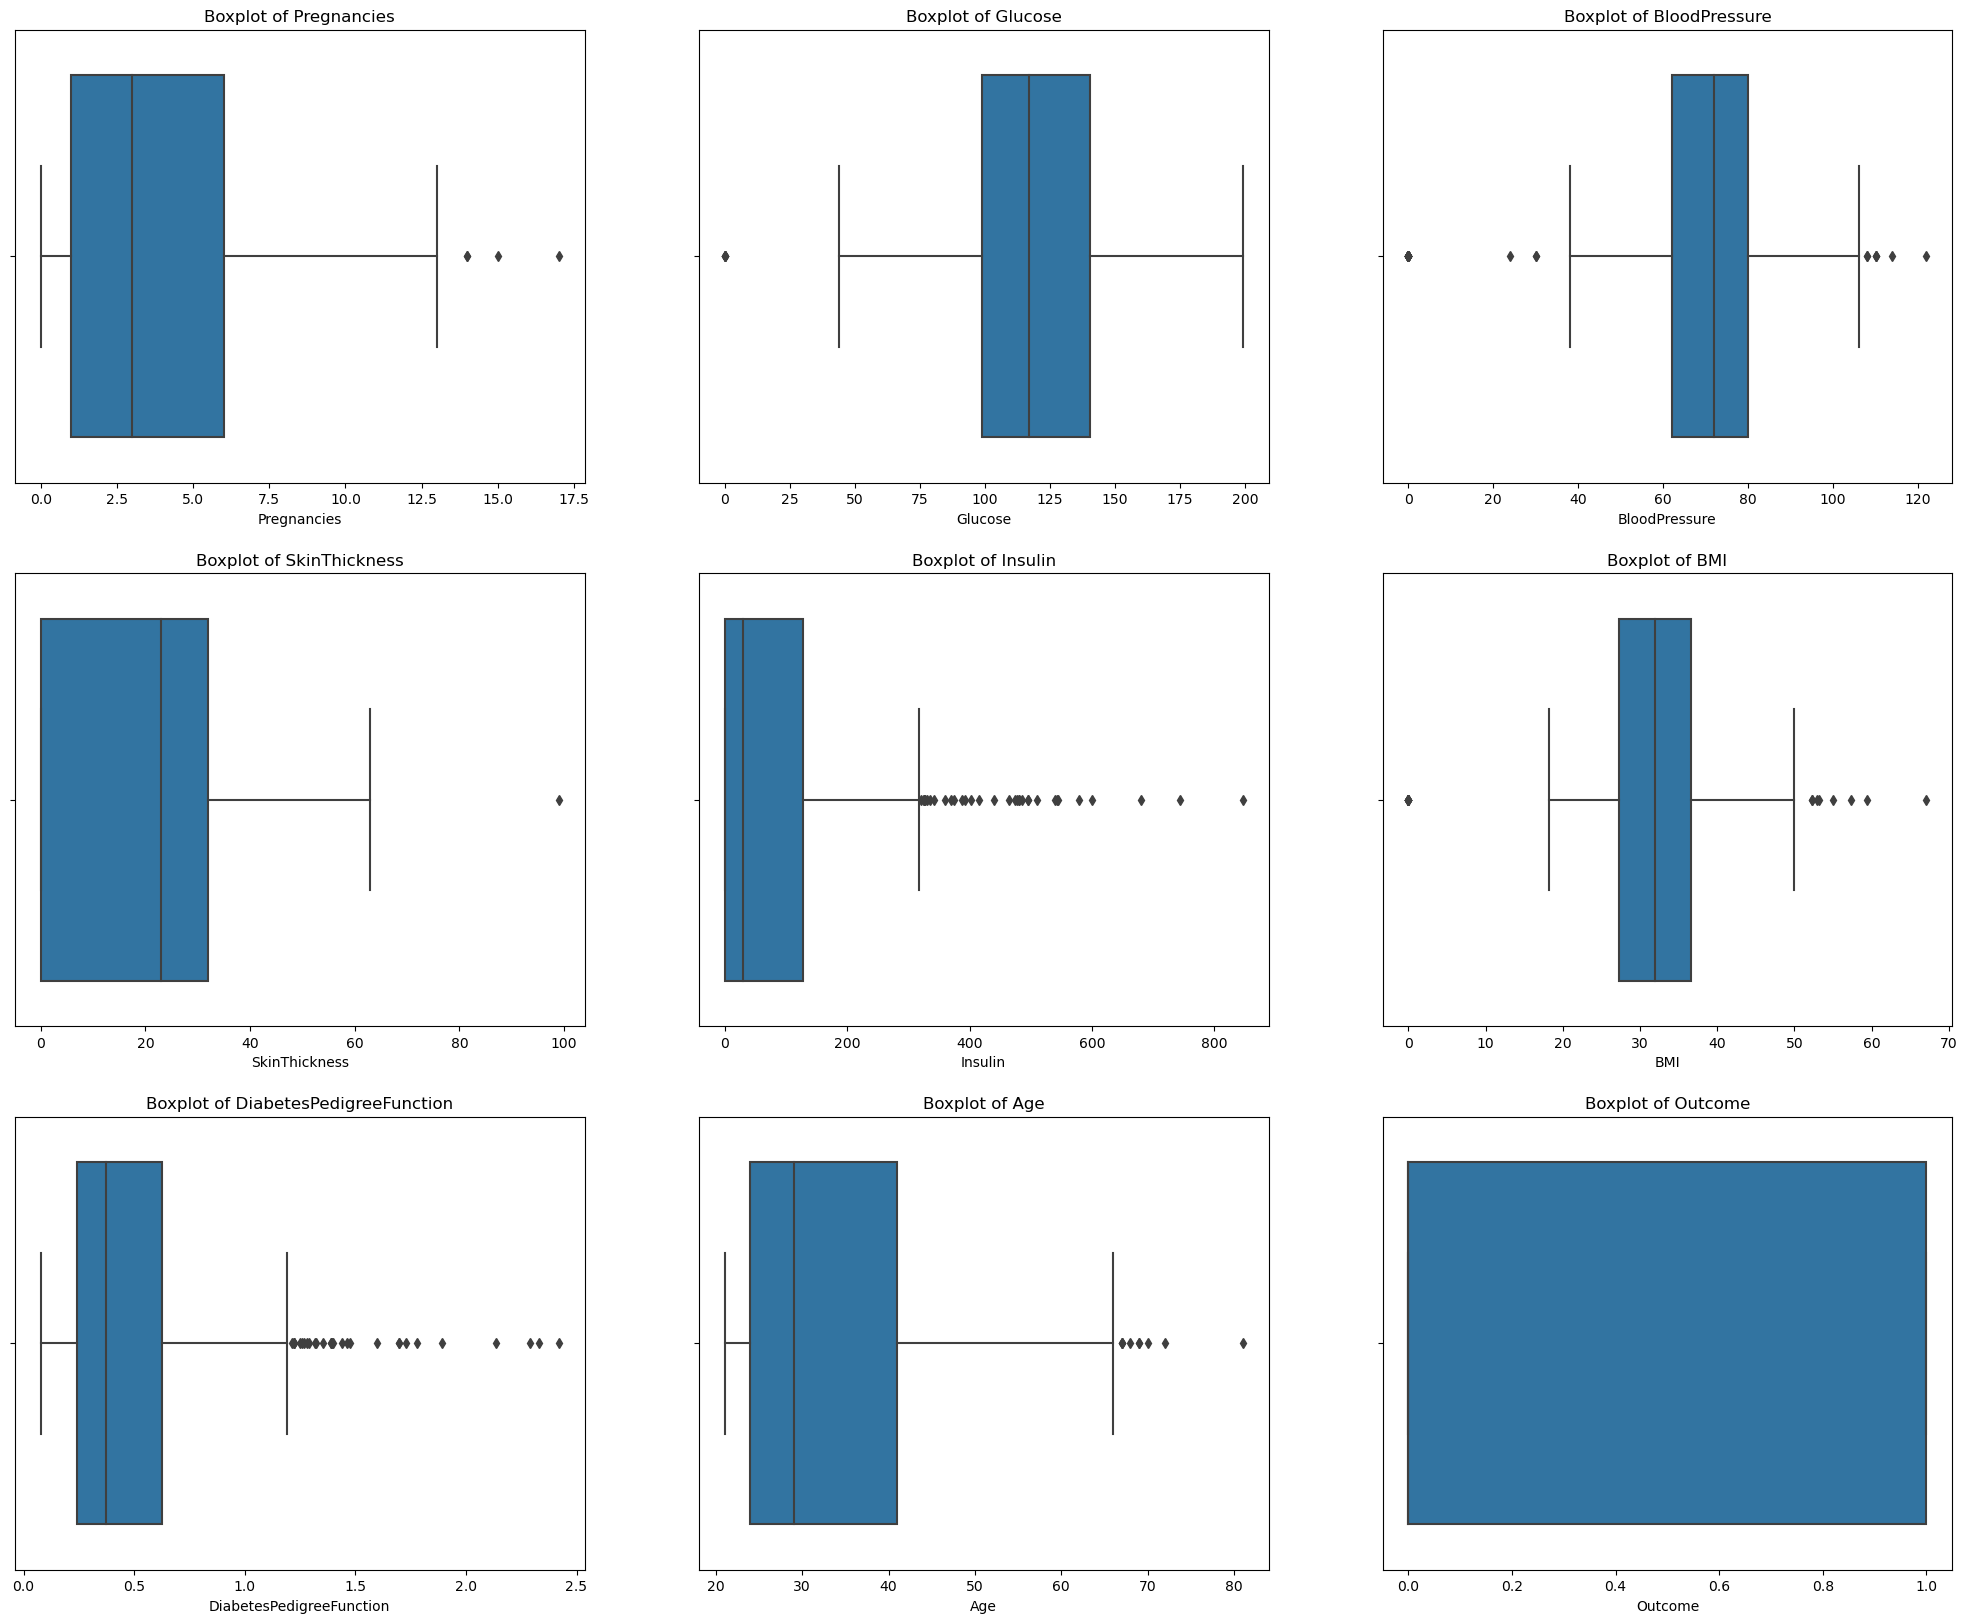

In [7]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(25, 20))
for i, column in enumerate(numerical_columns,1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
#     print(i,column)
numerical_columns

In [8]:
# df[df['Glucose']==0].fillna(mode())

In [9]:
df['Glucose'].mode()

0     99
1    100
Name: Glucose, dtype: int64

In [10]:
zero_counts = (df == 0).sum()
columns_with_zeros = zero_counts[zero_counts > 0]
print("Columns with counts of 0:")
print(columns_with_zeros)

Columns with counts of 0:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [11]:
# KNN IMPUTER 
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)


imputer = KNNImputer(n_neighbors=5)


df[columns_with_zeros] = imputer.fit_transform(df[columns_with_zeros])

print("Count of 0 values after imputation:")
print(df[columns_with_zeros].eq(0).sum())

Count of 0 values after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [12]:
# Handling missing data
def handle_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    
    # Replace outliers with the median
    data.loc[outliers, column] = data[column].median()
    return data

num_col = df.select_dtypes(include=[np.number]).columns.tolist()
for cols in num_col:
     df = handle_outliers_zscore(df, column)

In [13]:
# z_scores = zscore(df['Pregnancies'])
# outliers = (z_scores > 3) | (z_scores < -3)
# print(outliers)
# d = df.loc[outliers, 'Pregnancies'] = df['Pregnancies'].median()
# print(d)

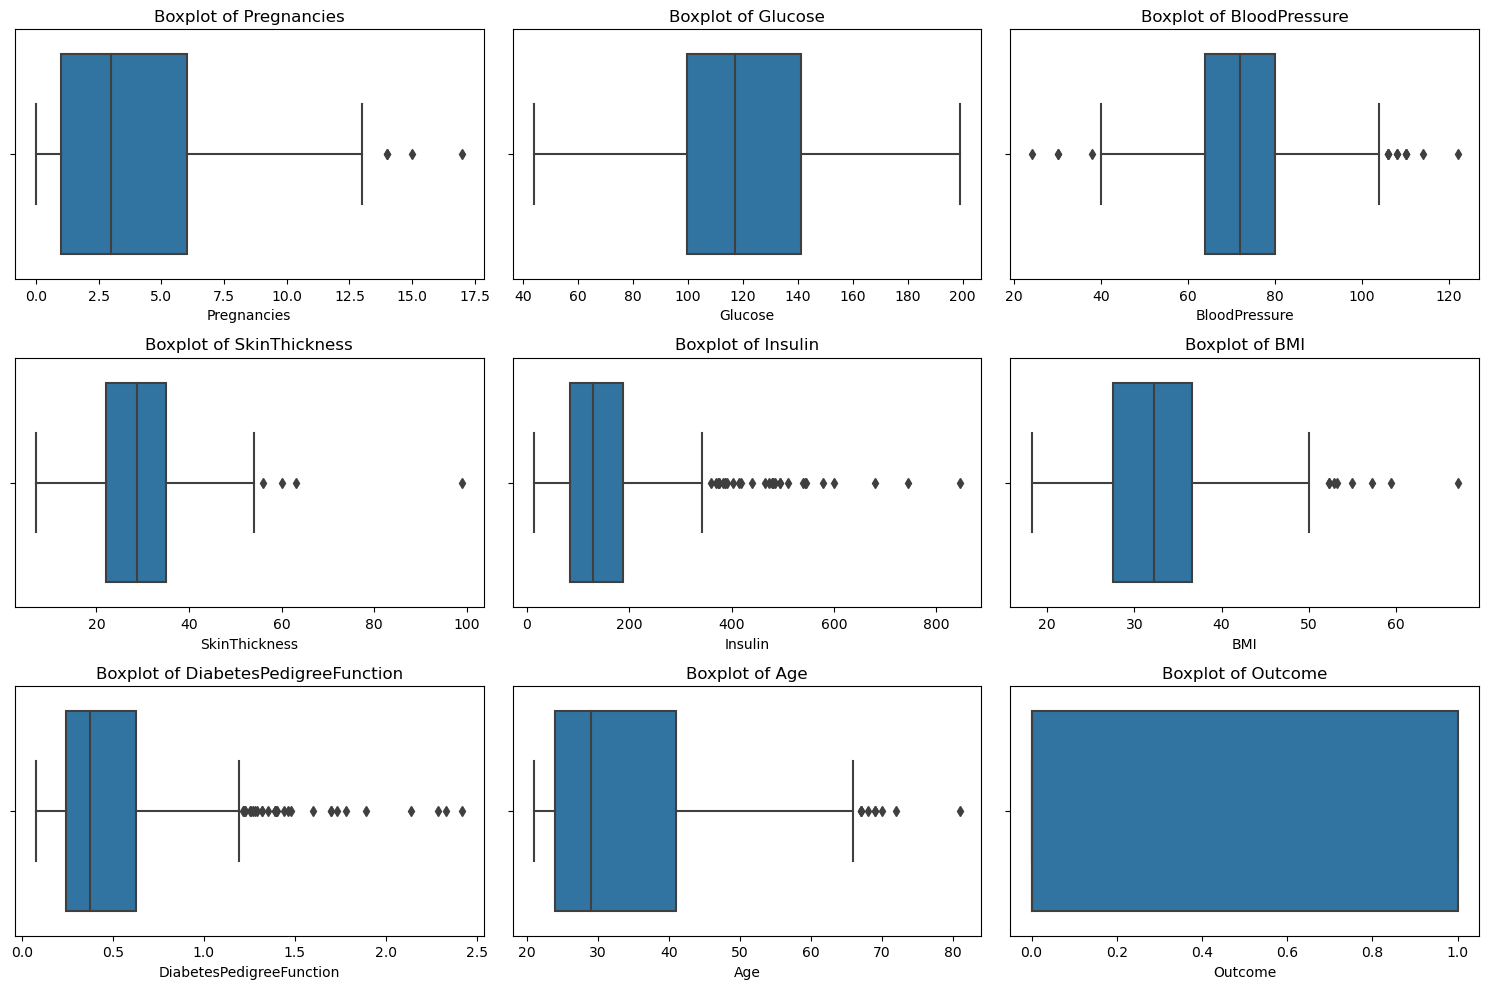

In [14]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

C:\Users\Abhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x1000 with 0 Axes>

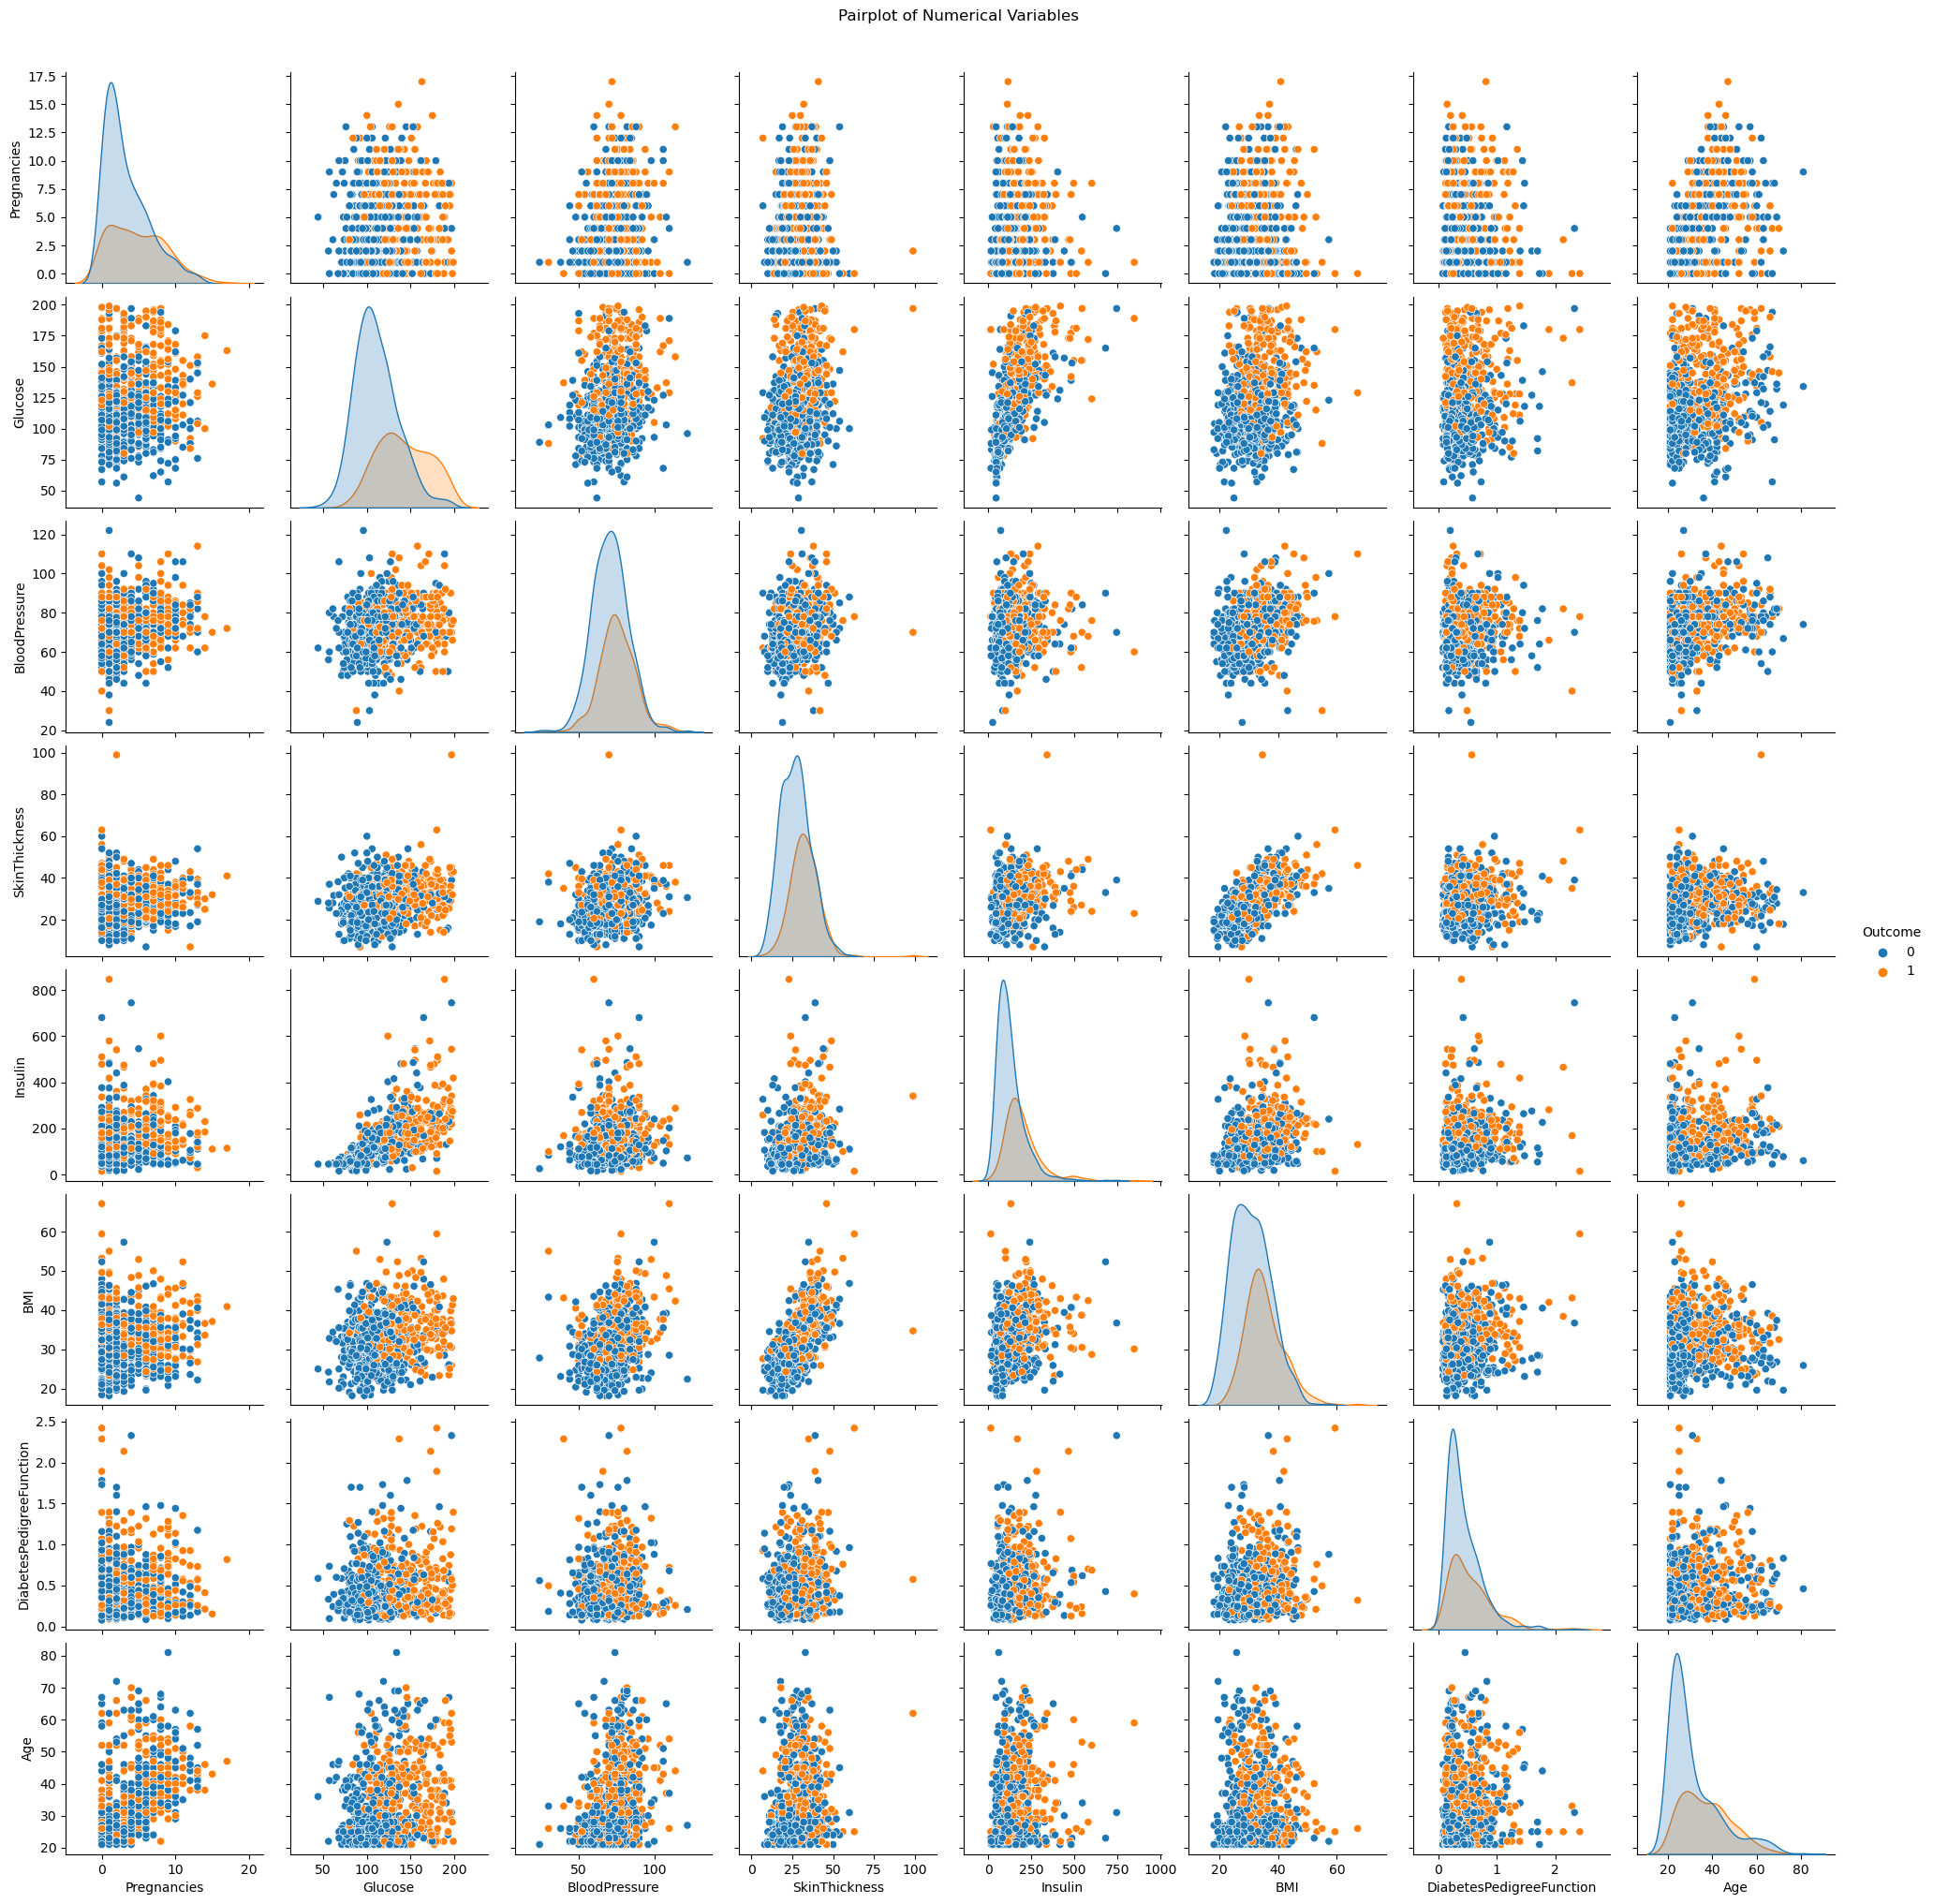

In [15]:
plt.figure(figsize=(12, 10))

sns.pairplot(df, hue='Outcome', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

<Axes: xlabel='Glucose', ylabel='Age'>

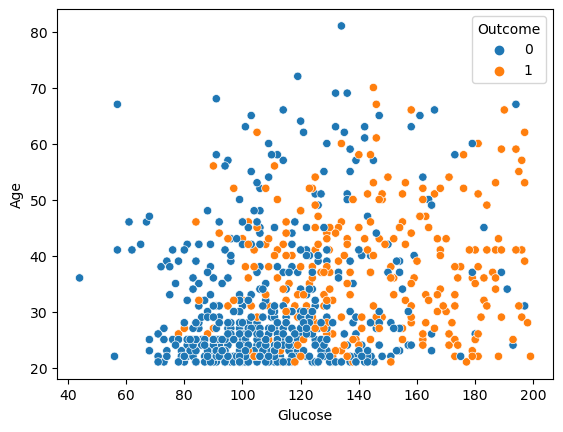

In [16]:
sns.scatterplot(data=df,x='Glucose',y='Age',hue='Outcome')

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,213.4,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.6,180.8,30.1,0.349,47,1


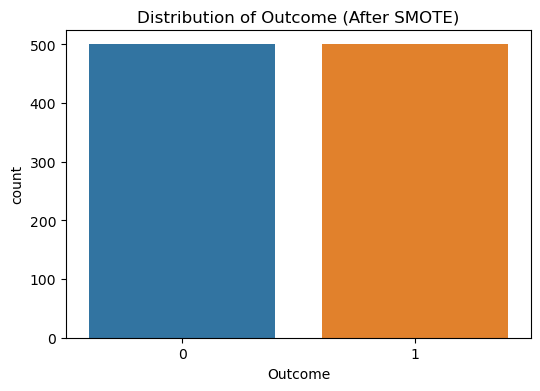

In [17]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)


plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_resampled)
plt.title('Distribution of Outcome (After SMOTE)')
plt.show()

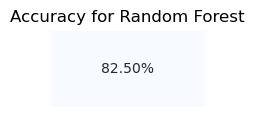

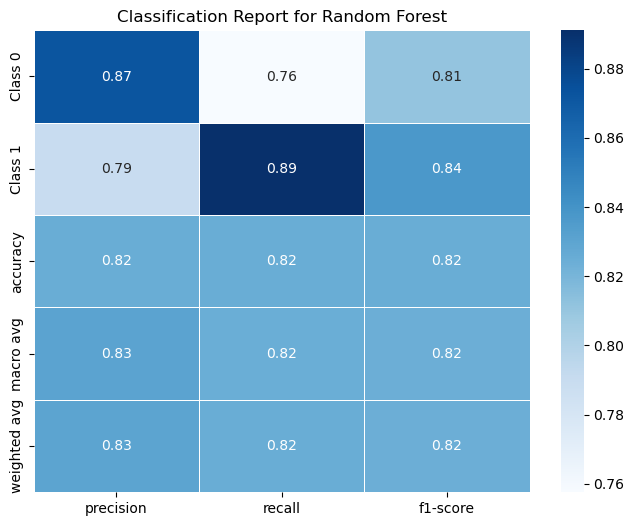

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

plt.figure(figsize=(2, 1))
sns.heatmap([[rf_accuracy]], annot=True, fmt=".2%", cmap='Blues', cbar=False, linewidths=.5, xticklabels=False, yticklabels=False)
plt.title('Accuracy for Random Forest')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True, cmap='Blues', linewidths=.5)
plt.title('Classification Report for Random Forest')
plt.show()


In [19]:
import pickle 
pickle.dump(rf_model,open('rf_model.pkl','wb'))

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# lr_model = LogisticRegression(random_state=42)
# lr_model.fit(X_train, y_train)
# rf_pred = lr_model.predict(X_test)

# rf_accuracy = accuracy_score(y_test, rf_pred)

# rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# plt.figure(figsize=(2, 1))
# sns.heatmap([[rf_accuracy]], annot=True, fmt=".2%", cmap='Blues', cbar=False, linewidths=.5, xticklabels=False, yticklabels=False)
# plt.title('Accuracy for Random Forest')
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True, cmap='Blues', linewidths=.5)
# plt.title('Classification Report for Random Forest')
# plt.show()

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# lr_model = DecisionTreeClassifier(random_state=42)
# lr_model.fit(X_train, y_train)
# rf_pred = lr_model.predict(X_test)

# rf_accuracy = accuracy_score(y_test, rf_pred)

# rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# plt.figure(figsize=(2, 1))
# sns.heatmap([[rf_accuracy]], annot=True, fmt=".2%", cmap='Blues', cbar=False, linewidths=.5, xticklabels=False, yticklabels=False)
# plt.title('Accuracy for Random Forest')
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.heatmap(pd.DataFrame(rf_report).iloc[:-1, :].T, annot=True, cmap='Blues', linewidths=.5)
# plt.title('Classification Report for Random Forest')
# plt.show()

In [ ]:
# Random forest will be best in this scene
